In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(666)
plt.style.use('bmh')

In [3]:
class Human(object):
    def __init__(self, ID, cash, tag='NORMAL'):
        self.cash = cash
        self.tag = tag
        self.ID = ID
        
    def update_cash(self, diff):
        self.cash += diff

class World(object):
    def __init__(self, normal_n, rich_n=0, poor_n=0,
                    NORMAL_CASH=100, RICH_CASH=200, POOR_CASH=50, DEBT=True):
        self.human_being = []
        ID = 0
        for i in range(poor_n):
            self.human_being.append(Human(ID, POOR_CASH, tag='POOR'))
            ID += 1
        for i in range(normal_n):
            self.human_being.append(Human(ID, NORMAL_CASH))
            ID += 1
        for i in range(rich_n):
            self.human_being.append(Human(ID, RICH_CASH, tag='RICH'))
            ID += 1
        self.total_human_n = len(self.human_being)
        self.in_debt = DEBT
            
    def next_round(self, exchange_cash=[], charm=[]):
        for i in range(self.total_human_n):
            
            #隨機挑選對象，如果有魅力值則設定特別機率
            my_choice = [ j for j in range(self.total_human_n) if j != i ]
            if charm != []:
                tmp_charm = charm.copy()
                del tmp_charm[i]
                p_unit = 1.0/np.sum(tmp_charm)
                p = [tmp_charm[k]*p_unit for k in range(len(tmp_charm))]
                target = np.random.choice(my_choice, p=p)
            else:
                target = np.random.choice(my_choice)
            
            #設定交換多少錢
            if exchange_cash != []:
                my_exchange_cash = exchange_cash[i]
            else:
                my_exchange_cash = 1
                
            #是否能夠負債
            if self.in_debt:
                self.human_being[target].update_cash(my_exchange_cash)
                self.human_being[i].update_cash(-my_exchange_cash)
            else:
                my_cash = self.human_being[i].cash
                if my_cash < my_exchange_cash:
                    self.human_being[target].update_cash(my_cash)
                    self.human_being[i].update_cash(-my_cash)
                else:
                    self.human_being[target].update_cash(my_exchange_cash)
                    self.human_being[i].update_cash(-my_exchange_cash)


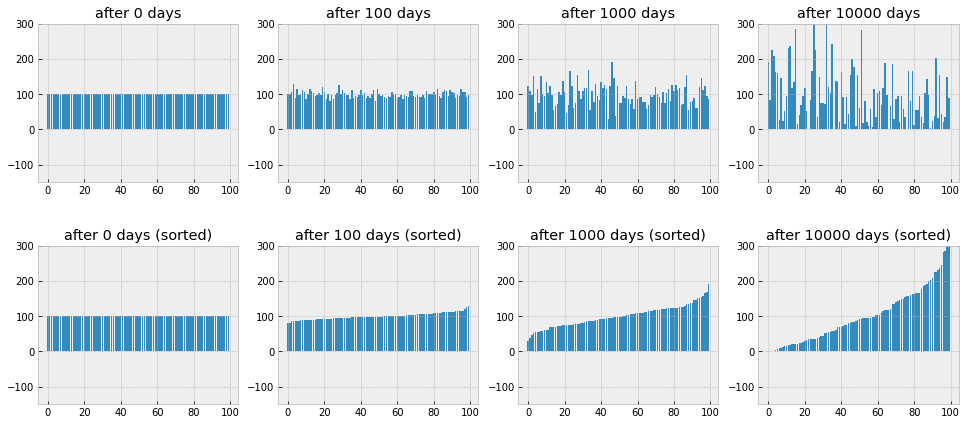

Wall time: 31 s


In [15]:

'''
世界#0：大家都生而平等，而且世界不會讓你餓死 (初始金錢相同、魅力值相同、沒有投機者、不會負債)
'''

def world_0():
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16.5,7))

    myWorld = World(normal_n=100, DEBT=False)
    plot_x = range(100)
    check_point = [0,100,1000,10000]

    for i in range(10000+1):
        if i in check_point:
            index = check_point.index(i)
            raw_h = myWorld.human_being.copy()
            h = [h.cash for h in raw_h]
            axes[0, index].bar(plot_x, h)
            axes[0, index].title.set_text('after %d days'%i)
            sorted_h = sorted(raw_h, key=lambda x: x.cash)
            h = [h.cash for h in sorted_h]
            axes[1, index].bar(plot_x, h)
            axes[1, index].title.set_text('after %d days (sorted)'%i)
        myWorld.next_round()

    for (m,n), subplot in np.ndenumerate(axes):
        subplot.set_ylim(-150,300)
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
%time world_0()

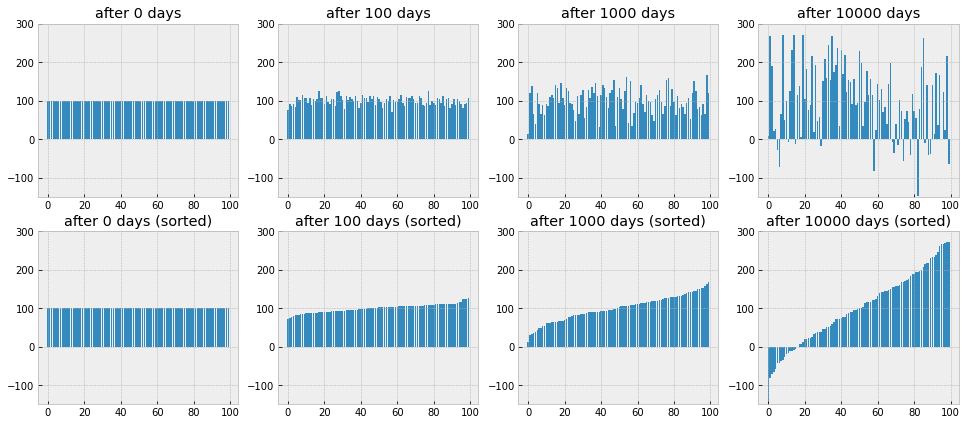

Wall time: 29.7 s


In [10]:
'''
世界#1：大家都生而平等 (初始金錢相同、魅力值相同、沒有投機者)
'''

def world_1():
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16.5,7))

    myWorld = World(normal_n=100)
    plot_x = range(100)
    check_point = [0,100,1000,10000]

    for i in range(10000+1):
        if i in check_point:
            index = check_point.index(i)
            raw_h = myWorld.human_being.copy()
            h = [h.cash for h in raw_h]
            axes[0, index].bar(plot_x, h)
            axes[0, index].title.set_text('after %d days'%i)
            sorted_h = sorted(raw_h, key=lambda x: x.cash)
            h = [h.cash for h in sorted_h]
            axes[1, index].bar(plot_x, h)
            axes[1, index].title.set_text('after %d days (sorted)'%i)
        myWorld.next_round()

    for (m,n), subplot in np.ndenumerate(axes):
        subplot.set_ylim(-150,300)
    plt.show()
    
%time world_1()

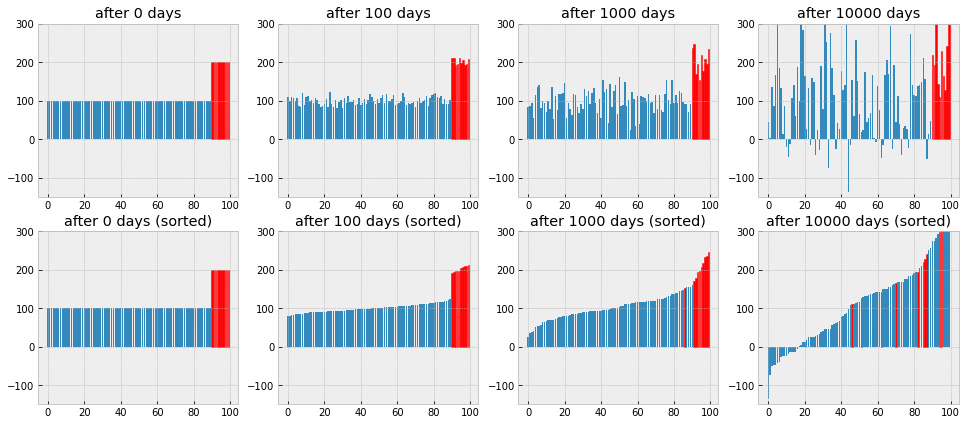

Wall time: 29.8 s


In [11]:
'''
世界#2：有些人是富二代 (初始金錢不同、魅力值相同、沒有投機者)
'''

def world_2():
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16.5,7))

    myWorld = World(normal_n=90, rich_n=10)
    plot_x = range(100)
    check_point = [0,100,1000,10000]

    for i in range(10000+1):
        if i in check_point:
            index = check_point.index(i)
            raw_h = myWorld.human_being.copy()
            h = [h.cash for h in raw_h]
            rich_index = [i for i in plot_x if raw_h[i].tag=='RICH']
            bars = axes[0, index].bar(plot_x, h)
            axes[0, index].title.set_text('after %d days'%i)
            for r in rich_index:
                bars[r].set_color('red')
            sorted_h = sorted(raw_h, key=lambda x: x.cash)
            rich_index = [i for i in plot_x if sorted_h[i].tag=='RICH']
            h = [h.cash for h in sorted_h]
            bars = axes[1, index].bar(plot_x, h)
            axes[1, index].title.set_text('after %d days (sorted)'%i)
            for r in rich_index:
                bars[r].set_color('red')
        myWorld.next_round()

    for (m,n), subplot in np.ndenumerate(axes):
        subplot.set_ylim(-150,300)
    plt.show()
    
%time world_2()

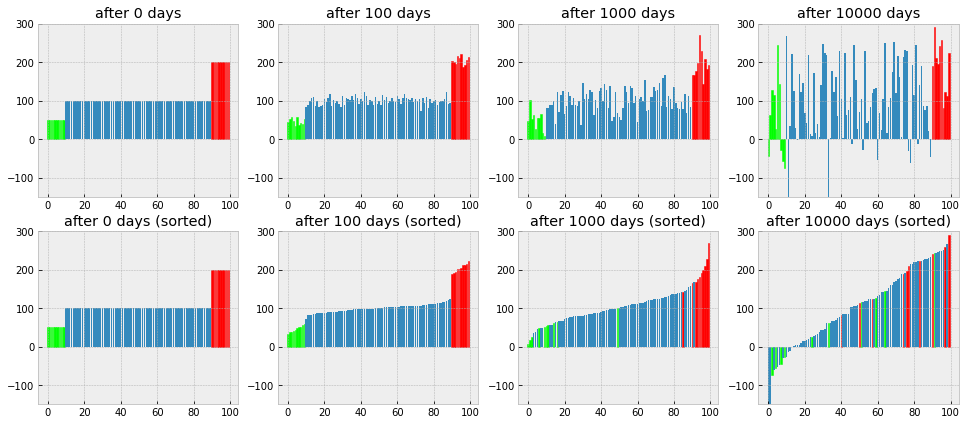

Wall time: 25.7 s


In [12]:
'''
世界#3：有些人是富二代、有些人是三級貧戶 (初始金錢不同、魅力值相同、沒有投機者)
'''

def world_3():
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16.5,7))

    myWorld = World(normal_n=80, rich_n=10, poor_n=10)
    plot_x = range(100)
    check_point = [0,100,1000,10000]

    for i in range(10000+1):
        if i in check_point:
            index = check_point.index(i)
            raw_h = myWorld.human_being.copy()
            h = [h.cash for h in raw_h]
            rich_index = [i for i in plot_x if raw_h[i].tag=='RICH']
            poor_index = [i for i in plot_x if raw_h[i].tag=='POOR']
            bars = axes[0, index].bar(plot_x, h)
            axes[0, index].title.set_text('after %d days'%i)
            for r in rich_index:
                bars[r].set_color('red')
            for p in poor_index:
                bars[p].set_color('lime')
            sorted_h = sorted(raw_h, key=lambda x: x.cash)
            rich_index = [i for i in plot_x if sorted_h[i].tag=='RICH']
            poor_index = [i for i in plot_x if sorted_h[i].tag=='POOR']
            h = [h.cash for h in sorted_h]
            bars = axes[1, index].bar(plot_x, h)
            axes[1, index].title.set_text('after %d days (sorted)'%i)
            for r in rich_index:
                bars[r].set_color('red')
            for p in poor_index:
                bars[p].set_color('lime')
        myWorld.next_round()

    for (m,n), subplot in np.ndenumerate(axes):
        subplot.set_ylim(-150,300)
    plt.show()
    
%time world_3()

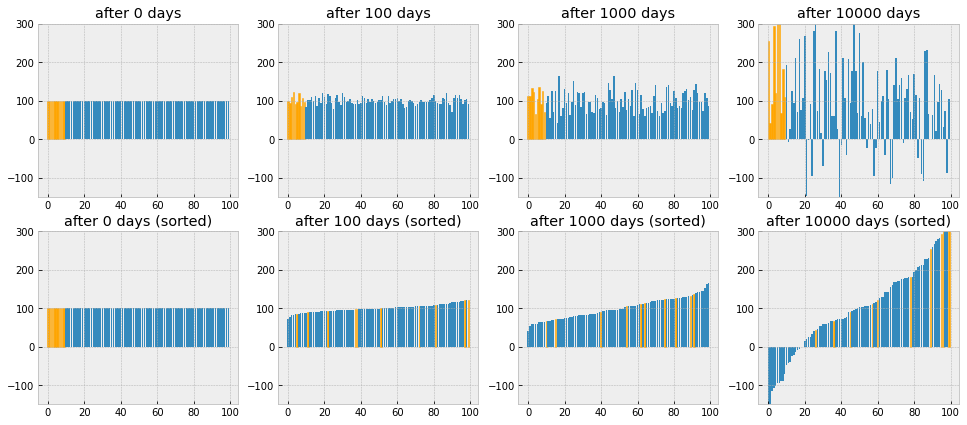

Wall time: 1min 22s


In [14]:
'''
世界#4：大家財力相同、魅力不同 (初始金錢相同、魅力值不同、沒有投機者)
'''

def world_4():
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16.5,7))

    myWorld = World(normal_n=100)
    plot_x = range(100)
    check_point = [0,100,1000,10000]

    charm = [1.01 for _ in range(10)]
    for _ in range(90):
        charm.append(1)
    for i in range(10):
        myWorld.human_being[i].tag = "CHARMING"

    for i in range(10000+1):
        if i in check_point:
            index = check_point.index(i)
            raw_h = myWorld.human_being.copy()
            h = [h.cash for h in raw_h]
            charm_index = [i for i in plot_x if raw_h[i].tag=='CHARMING']
            bars = axes[0, index].bar(plot_x, h)
            axes[0, index].title.set_text('after %d days'%i)
            for r in charm_index:
                bars[r].set_color('orange')
            sorted_h = sorted(raw_h, key=lambda x: x.cash)
            charm_index = [i for i in plot_x if sorted_h[i].tag=='CHARMING']
            h = [h.cash for h in sorted_h]
            bars = axes[1, index].bar(plot_x, h)
            axes[1, index].title.set_text('after %d days (sorted)'%i)
            for r in charm_index:
                bars[r].set_color('orange')
        myWorld.next_round(charm=charm)

    for (m,n), subplot in np.ndenumerate(axes):
        subplot.set_ylim(-150,300)
    plt.show()

%time world_4()